In [ ]:
# Basic imports
import os
import sys
import time
import timeit
import random
import pickle
import re
from itertools import product
import warnings

# System path modification
sys.path.insert(0, '..')

# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer, MissingIndicator
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, cross_validate, cross_val_score
)
from sklearn.linear_model import (
    LinearRegression, Lasso, LassoCV, MultiTaskLasso, MultiTaskLassoCV,
    ElasticNet, ElasticNetCV, MultiTaskElasticNet, MultiTaskElasticNetCV
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

from sklearn.cross_decomposition import PLSRegression
from sklearn.inspection import permutation_importance


# Statistic imports 
from scipy.stats import ks_2samp
from scipy.special import kl_div
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist, squareform

# Specialized imputation and visualization packages
import miceforest as mf
import missingno as msno
#from missforest import MissForest
#import magic
from src.gain import *

# Custom modules
from src.train import *
from src.functions import *
from src.plots import *
from src.dataset import *
from src.multixgboost import *

# Visualizatiokn 
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning and machine learning specific 
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
import xgboost as xgb
import shap

# Ignore warnings
warnings.filterwarnings("ignore")

# Print CUDA availability for PyTorch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

ModuleNotFoundError: No module named 'gain_utils'

In [1]:
from pytorch_tabnet.tab_model import TabNetRegressor
TabNetRegressor()

/home/chris/miniforge3/envs/optimus/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])

In [2]:
results_pickle_folder = "./6.1.2_missingnesss_aware_selection_pickle"

In [3]:
df_X_original = pd.read_pickle('../pickle/df_X_original.pickle')
df_X = pd.read_pickle('../pickle/df_X_filtered.pickle')
df_y =  pd.read_pickle('../pickle/df_y_original.pickle')
df_all = pd.read_pickle('../pickle/df_all_original.pickle')
select = pd.read_pickle('../pickle/select_features.pickle')

miss_mask = pd.read_pickle('../pickle/filter_miss_mask.pickle')
miss_mask = miss_mask.tolist()


NameError: name 'pd' is not defined

In [ ]:
df_X = df_X_original.drop(columns=[*select["MRIvol"], *select["PET"]])
df_X = df_X[miss_mask]
df_all = df_all[miss_mask]
df_y = df_y[miss_mask]

In [ ]:
full_palette_tab = {"pink": "#d95990", "yellow": "#dbc205", "blue": "#51c1e6", "purple":"#a6609e", "red":"#df3d21", "grey":"#6e6e6e"}
gender_palette_tab = {
    "0": full_palette_tab["yellow"], 
    "1": full_palette_tab["pink"]
}
dx_palette_tab = {
    "CN": full_palette_tab["blue"],
    "MCI": full_palette_tab["yellow"],
    "AD": full_palette_tab["red"], 
}

In [ ]:
gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_tab
sns.color_palette(list(full_palette.values()))

[(0.8509803921568627, 0.34901960784313724, 0.5647058823529412),
 (0.8588235294117647, 0.7607843137254902, 0.0196078431372549),
 (0.3176470588235294, 0.7568627450980392, 0.9019607843137255),
 (0.6509803921568628, 0.3764705882352941, 0.6196078431372549),
 (0.8745098039215686, 0.23921568627450981, 0.12941176470588237),
 (0.43137254901960786, 0.43137254901960786, 0.43137254901960786)]

In [ ]:
full_palette_graph = {"orange": "#de7859", "yellow": "#ebed72", "blue": "#3f4861","cyan": "#7ad8eb", "purple":"#b1a7cf", "green":"#75bfaa"}

gender_palette_tab = {
    "0": full_palette_graph["green"], 
    "1": full_palette_graph["purple"]
}
dx_palette_tab = {
    "CN": full_palette_graph["cyan"],
    "MCI": full_palette_graph["yellow"],
    "AD": full_palette_graph["orange"], 
}
print()

gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_tab

sns.color_palette(list(full_palette_graph.values()))

[(0.8705882352941177, 0.47058823529411764, 0.34901960784313724),
 (0.9215686274509803, 0.9294117647058824, 0.4470588235294118),
 (0.24705882352941178, 0.2823529411764706, 0.3803921568627451),
 (0.47843137254901963, 0.8470588235294118, 0.9215686274509803),
 (0.6941176470588235, 0.6549019607843137, 0.8117647058823529),
 (0.4588235294117647, 0.7490196078431373, 0.6666666666666666)]

In [ ]:
full_palette_graph = {"orange": "#a93226", "yellow": "#FF9933", "blue": sns.color_palette("Set1")[1], "cyan": sns.color_palette("Set1")[5], "purple":sns.color_palette("Set1")[3], "green":sns.color_palette("Set1")[2]}
gender_palette_tab = {
    "0": full_palette_graph["green"], 
    "1": full_palette_graph["purple"]
}
dx_palette_tab = {
    "CN": full_palette_graph["blue"],
    "MCI": full_palette_graph["yellow"],
    "AD": full_palette_graph["orange"], 
}

gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_tab

sns.color_palette(list(full_palette_graph.values()))

[(0.6627450980392157, 0.19607843137254902, 0.14901960784313725),
 (1.0, 0.6, 0.2),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (1.0, 1.0, 0.2),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)]

In [ ]:
full_palette_graph = {"orange": "#ff4b41", "yellow": "#ffaa41", "blue": "#75d8ff", 
                      "cyan": "#d7d341", "purple":"#e59edd", 
                      "green":"#70d941"}
gender_palette_tab = {
    "0": full_palette_graph["green"], 
    "1": full_palette_graph["purple"]
}
dx_palette_tab = {
    "CN": "#75d8ff",
    "MCI": "#ffcc92",
    "AD": "#ff4b41", 
}

gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_graph
sns.color_palette(list(full_palette.values()))

[(1.0, 0.29411764705882354, 0.2549019607843137),
 (1.0, 0.6666666666666666, 0.2549019607843137),
 (0.4588235294117647, 0.8470588235294118, 1.0),
 (0.8431372549019608, 0.8274509803921568, 0.2549019607843137),
 (0.8980392156862745, 0.6196078431372549, 0.8666666666666667),
 (0.4392156862745098, 0.8509803921568627, 0.2549019607843137)]

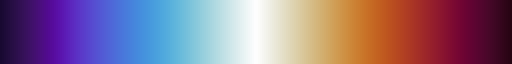

In [ ]:
from cmap import Colormap

cm_div = Colormap('cmasher:fusion_r').to_matplotlib()
cm_div


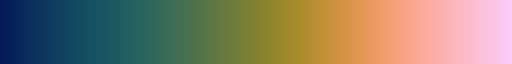

In [ ]:
cm_seq = Colormap('batlow').to_matplotlib()
cm_seq

##### Extra plot for transcriptomics

In [ ]:
df_X.columns.has_duplicates

False

In [ ]:
df_all_counts = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/filtered_counts.csv", index_col=0)
df_samples = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/filtered_samples.csv", index_col=0)
df_genes = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/filtered_genes.csv", index_col=0)
df_dge = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/dge_gene_selection.csv", index_col=0)
df_dge_median = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/dge_gene_selection_median_filter.csv", index_col=0)
df_samr = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/samr_gene_up.csv", index_col=0)

In [ ]:
df_X_rna = pd.concat([df_X[list(set(select["RNA"]))].reset_index(drop=True), 
                      df_all[["RID", "DX"]].reset_index(drop=True)], axis=1).dropna().drop_duplicates().sort_values("RID").drop_duplicates(subset="RID")

custom_dict = {'CN': 0, 'MCI': 1, 'AD': 2}

df_X_rna = df_X_rna.sort_values("DX", key=lambda x: x.map(custom_dict))
print(df_X_rna.columns.has_duplicates or df_X_rna.RID.duplicated().sum())

0


CN
MCI
AD


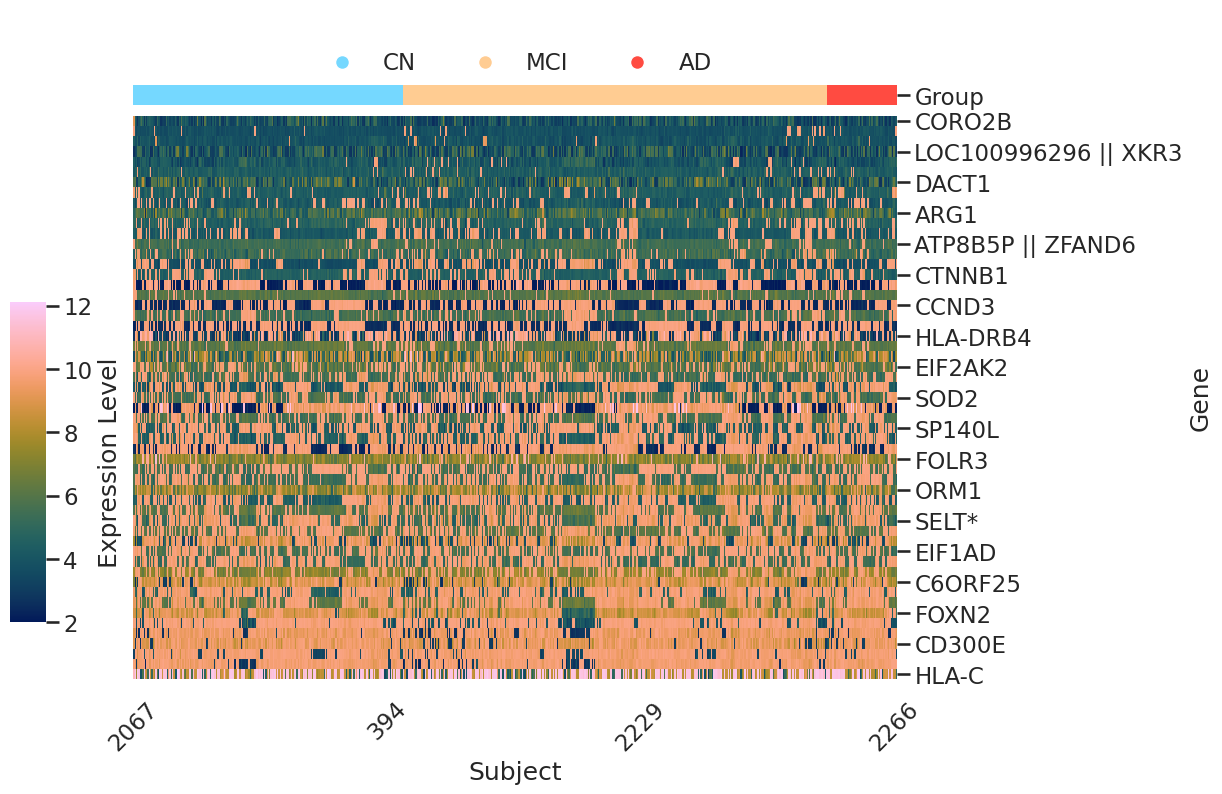

In [ ]:
ordered_subjects= []

sns.set(style="whitegrid", context="talk")

for dx in ["CN", "MCI", "AD"]: 
    print(dx)
    group_data = df_X_rna[df_X_rna.DX == dx]

    distance_matrix = pdist(group_data.drop(columns=["RID", "DX"]), metric="euclidean")  
    linkage_matrix = linkage(distance_matrix, method="centroid")  

    # Get the order of columns based on hierarchical clustering
    clustered_order = [group_data.index[i] for i in leaves_list(linkage_matrix)]
    
    # Add the clustered order to the list of ordered columns
    ordered_subjects.extend(clustered_order)

# Sort transcriptomics Subjects
df_X_rna = df_X_rna.reindex(ordered_subjects)

# Sort transcriptmics Genes
ordered_genes = df_dge.sort_values("logCPM").drop_duplicates("Symbol", keep="first").Symbol.tolist()
# ordered_genes = df_X_rna.drop(columns=["RID", "DX"]).mean().sort_values().index.tolist()

df_X_rna = df_X_rna.reindex(["RID", "DX"]+ordered_genes, axis=1)

dx_colors = df_X_rna["DX"].rename("Group").map(dx_palette_tab)
df_X_rna_sorted = df_X_rna.drop(columns=["RID", "DX"]).T.dropna()

g = sns.clustermap(df_X_rna_sorted, figsize=(12,8), dendrogram_ratio=0.1, 
               col_colors=dx_colors, cmap=cm_seq, method="centroid", col_cluster=False, row_cluster=False,
               cbar_kws={"label": "Expression Level"},
               cbar_pos=(0, .2, .03, .4)) #, xticklabels=False)

# Reduce the number of ticks in the x-axis by setting new ticks manually
num_ticks = 3  # Choose how many ticks you want
tick_positions = range(0, len(df_X_rna_sorted.columns), max(1, len(df_X_rna_sorted.columns) // num_ticks))

# Ensure the number of ticks does not exceed the available columns
tick_positions = tick_positions[:len(g.ax_heatmap.get_xticklabels())]  # Adjust the number of positions if necessary

# Apply the new x-ticks and their labels
tick_labels = g.ax_heatmap.get_xticklabels()
step = len(tick_labels) // len(tick_positions) if len(tick_positions) > 0 else 1
g.ax_heatmap.set_xticks(tick_positions)
g.ax_heatmap.set_xticklabels(tick_labels[:len(tick_positions)], rotation=45)  # Make sure labels match the tick positions

# Add x and y axis labels
g.ax_heatmap.set_xlabel("Subject", fontsize=18)
g.ax_heatmap.set_ylabel("Gene", fontsize=18)

# Add a custom legend for group_colors at the top
handles, labels = [], []
for label, color in dx_palette_tab.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(label)

# Position the legend at the top, horizontally
g.ax_heatmap.legend(handles, labels,loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False)

plt.savefig("../figures/heatmap_final_trasncriptomics_mean_sorted.png", format="png", bbox_inches='tight',  )

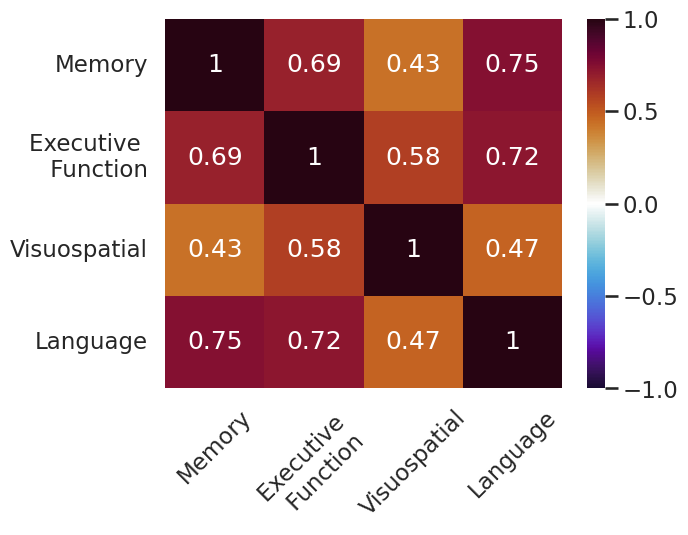

In [ ]:
# Mapping the current column names to more readable names
label_map = {
    "ADNI_MEM": "Memory",
    "ADNI_EF": "Executive \n Function",
    "ADNI_VS": "Visuospatial",
    "ADNI_LAN": "Language"
}

# Rename the columns in df_y using the label_map
df_y_renamed = df_y.rename(columns=label_map)

# Plotting the heatmap
sns.set(style="whitegrid", context="talk")
sns.heatmap(df_y_renamed.corr(), cmap=cm_div, annot=True, vmax=1, vmin=-1, cbar_kws=dict(ticks=[1, .5, 0, -0.5, -1]))
plt.xticks(rotation=45)
# Save the figure
plt.savefig("../figures/cognitive_target_correlation.png", bbox_inches='tight',  format="png")

# Scikit-learn Pipeline

In [ ]:
df_X.describe()

ARG1  ATP8B5P || ZFAND6    C17ORF103      C6ORF25          CLU  \
count  1576.000000        1576.000000  1576.000000  1576.000000  1576.000000   
mean      5.465829           5.876769     5.176332     8.388430     8.110685   
std       0.980437           1.262680     1.877623     1.678091     2.309744   
min       2.628000           3.910000     3.702000     2.507000     2.638000   
25%       4.740000           5.311000     4.260000     8.260000     8.258000   
50%       5.480000           5.528500     4.437000     8.843500     9.192500   
75%       6.127500           5.832000     4.799000     9.302000     9.566000   
max       8.663000           9.994000     9.998000     9.987000     9.998000   

            CORO2B       CTNNB1        DACT1       ELOVL5        FOLR3  ...  \
count  1576.000000  1576.000000  1576.000000  1576.000000  1576.000000  ...   
mean      3.914099     6.107469     4.846871     7.125889     7.625505  ...   
std       0.880751     2.400343     1.314009     2.770450     1.215831  ...   
min       2.512000     3.824000     2.530000     2.895000     4.960000  ...   
25%       3.177000     4.487000     3.774000     4.156000     6.897000  ...   
50%       3.811000     4.708000     4.818000     9.193000     7.381000  ...   
75%       4.523000     9.684000     5.855000     9.704000     7.920000  ...   
max       9.126000     9.999000     8.674000     9.999000    11.240000  ...   

       LH_Default_pCunPCC_1_Cortical  RH_Default_PFCdPFCm_6_Cortical  \
count                    2894.000000                     2894.000000   
mean                        2.426352                        2.294729   
std                         0.210257                        0.175983   
min                         0.092409                        1.036019   
25%                         2.293128                        2.193473   
50%                         2.430732                        2.306192   
75%                         2.571078                        2.411552   
max                         3.064751                        2.946740   

       LH_Default_pCunPCC_2_Cortical  RH_Default_PFCdPFCm_7_Cortical  \
count                    2894.000000                     2894.000000   
mean                        2.442075                        2.347467   
std                         0.200666                        0.202041   
min                         0.662630                        1.158819   
25%                         2.323516                        2.231359   
50%                         2.457016                        2.356849   
75%                         2.576584                        2.478044   
max                         3.201875                        3.139660   

       LH_Default_pCunPCC_3_Cortical  RH_Default_pCunPCC_1_Cortical  \
count                    2894.000000                    2894.000000   
mean                        2.617300                       2.465994   
std                         0.196827                       0.206006   
min                         0.861630                       0.933154   
25%                         2.492637                       2.338554   
50%                         2.617977                       2.477207   
75%                         2.743150                       2.601740   
max                         3.379257                       3.152664   

       LH_Default_pCunPCC_4_Cortical  RH_Default_pCunPCC_2_Cortical  \
count                    2894.000000                    2894.000000   
mean                        2.221523                       2.437534   
std                         0.198146                       0.185326   
min                         0.806433                       0.920390   
25%                         2.107488                       2.329423   
50%                         2.235622                       2.455362   
75%                         2.350323                       2.561225   
max                         2.810952                       2.938689   

   

In [ ]:
df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]] = df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]].astype("category")
df_all[["RID", "VISCODE", "ABETA", "TAU", "PTAU"]].dropna().RID.value_counts()

1190    5
729     5
671     4
1046    4
31      4
       ..
1090    1
1097    1
1109    1
1117    1
5290    1
Name: RID, Length: 327, dtype: int64

In [ ]:
df_all[["RID", "VISCODE", "ABETA", "TAU", "PTAU"]].dropna().VISCODE.value_counts()

m24     176
m12     118
m48      47
bl       32
m36      30
m60      15
m72       8
m84       3
m96       2
m108      1
Name: VISCODE, dtype: int64

## Modify imputers to add to Pipeline 

Miceforest should have both fit and transform classes to be called in a scikit-learn pipeline, however, let's write a quick wrapper who also has the fit transform function. 

# Build scikit-learn pipeline without pipeline since it is not working

In [ ]:
def train_imputer_model(
    df_X_train, df_X_test, df_y_train, df_y_test,
    c_train, c_test,
    ordinal_model, name_ordinal_imputer, 
    continuous_model, name_continuous_imputer, 
    model, name_model, 
    imputer_model=None, name_imputer=None, 
    separate_imputers=True,
    ordinal_features = ['APOE_epsilon2', 'APOE_epsilon3', 'APOE_epsilon4']
): 
    # Define which columns are ordinal and which are continuous
    continuous_features = [col for col in df_X_train.columns if col not in ordinal_features]

    # Check if a general imputer model (like MissForest or MICEForest) is provided
    if imputer_model is not None and name_imputer is not None and not separate_imputers:
        # If `imputer_model` can handle both categorical and continuous data types
        print(f"Using general imputer model: {name_imputer}")

        # Ensure that ordinal columns are marked as categorical
        df_X_train = df_X_train.copy()
        df_X_test = df_X_test.copy()
        
        for col in ordinal_features:
            df_X_train[col] = df_X_train[col].astype("category")
            df_X_test[col] = df_X_test[col].astype("category")

        # Create a pipeline with the general imputer
        pipeline = Pipeline(steps=[
            (name_imputer, imputer_model)
        ])

        # Fit and transform the entire dataset with the general imputer
        pipeline.fit(df_X_train)
        X_train_imputed = pipeline.transform(df_X_train)
        X_test_imputed = pipeline.transform(df_X_test)

        # Convert transformed output back to DataFrame with original column names
        df_X_train_imputed = pd.DataFrame(X_train_imputed, columns=df_X_train.columns)
        df_X_test_imputed = pd.DataFrame(X_test_imputed, columns=df_X_test.columns)

    else:
        # Separate imputers for ordinal and continuous data
        print("Using separate imputers for ordinal and continuous data.")

        df_X_train = df_X_train.copy()
        df_X_test = df_X_test.copy()

        # Continuous Imputation Transformer (Example: SimpleImputer)
        continuous_imputer = Pipeline([
            (name_continuous_imputer, continuous_model),
        ])

        # Ordinal Imputation Transformer (Example: KNN Imputer)
        ordinal_imputer = Pipeline([
            (name_ordinal_imputer, ordinal_model)
        ])

        # Create a ColumnTransformer to apply the appropriate imputer to each type of variable
        preprocessor = ColumnTransformer(
            transformers=[
                ('ordinal', ordinal_imputer, ordinal_features),
                ('continuous', continuous_imputer, continuous_features)
            ],
            remainder='passthrough'
        )

        # Create the pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor)
        ])

         # Separate imputers for ordinal and continuous data

        # Fit and transform, then convert back to DataFrame with original column names

        if df_X_train.isna().any().any():
                
            start = time.time()
            pipeline.fit(df_X_train)
            end = time.time()

            impute_model_time = end - start

            X_train_imputed = pipeline.transform(df_X_train)
            df_X_train_imputed = df_X_train.copy()
            df_X_train_imputed[ordinal_features+continuous_features] = X_train_imputed

        else :
            print("No NaN in train data -> Keep as it is. ")
            df_X_train_imputed = df_X_train
            
            impute_model_time = None

        # Transform the test set
        if df_X_test.isna().any().any():
             
            X_test_imputed = pipeline.transform(df_X_test)
            df_X_test_imputed = df_X_test.copy()
            df_X_test_imputed[ordinal_features+continuous_features] = X_test_imputed
        else : 
            print("No NaN in test data -> Keep as it is. ")
            df_X_test_imputed = df_X_test

    #df_X_train_imputed[ordinal_features] = df_X_train_imputed[ordinal_features].astype("category")
    #df_X_test_imputed[ordinal_features] = df_X_test_imputed[ordinal_features].astype("category")

    # Demographics adjustment for y
    demographic_adjustment_y = DemographicAdjustmentTransformer()
    
    y_train_adjusted = demographic_adjustment_y.fit_transform(df_y_train, c_train)
    y_test_adjusted = demographic_adjustment_y.transform(df_y_test, c_test)

    # Demographics adjustment for X
    demographic_adjustment_X = DemographicAdjustmentTransformer(categorical_columns=ordinal_features)
    X_train_adjusted = demographic_adjustment_X.fit_transform(df_X_train_imputed, c_train)
    X_test_adjusted = demographic_adjustment_X.transform(df_X_test_imputed, c_test)

    # Perform prediction and save variables
    start = time.time()

    if isinstance(model, TabNetRegressor): 
        X_train_adjusted = X_train_adjusted.values
        y_train_adjusted = y_train_adjusted.values

        X_test_adjusted = X_test_adjusted.values
        #y_test_adjusted = y_test_adjusted.values
    
    model.fit(X_train_adjusted, y_train_adjusted)
    end = time.time()

    predict_model_time = end - start

    y_pred_adjusted = model.predict(X_test_adjusted)

    y_pred_adjusted = pd.DataFrame(y_pred_adjusted, columns=y_test_adjusted.columns)

    # Metrics computed in original space
    y_pred = demographic_adjustment_y.inverse_transform(y_pred_adjusted, c_test)

    params = {
        "ordinal_imputer": name_ordinal_imputer, 
        "continuous_imputer": name_continuous_imputer, 
        "model": name_model, "train_shape" : X_train_adjusted.shape, 
        "test_shape": X_test_adjusted.shape
    }
    
    if df_X_test.shape[0] != 1: 

        # Metrics computed in adjusted space
        mse_score_adj, mae_score_ajd, r2_adj, explained_variance_adj, corr_adj = compute_all_metrics(y_test_adjusted.values, y_pred_adjusted)

        results_adj = {
            "mse_score": mse_score_adj, 
            "mae_score":mae_score_ajd, 
            "r2":r2_adj, 
            "explained_variance":explained_variance_adj, 
            "corr":corr_adj, 
        }

        mse_score, mae_score, r2, explained_variance, corr = compute_all_metrics(df_y_test.values, y_pred)

        results_org = {
            "mse_score": mse_score, 
            "mae_score": mae_score, 
            "r2": r2, 
            "explained_variance": explained_variance, 
            "corr": corr, 
        }

    else : 
        print("Saving predictions in dict!")
        results_adj = {
            "y_pred": y_pred_adjusted.values, 
            "y_test": y_test_adjusted.values,
        }

        results_org = {
            "y_pred": y_pred.values, 
            "y_test": df_y_test.values,
        }


    dict_results = {
        "params": params, 
        "imputation_time": impute_model_time,
        "fitting_time": predict_model_time, 
        "results_adj": results_adj, 
        "results_org": results_org
        }

    return dict_results


Now let's list all imputation models and machine learning models that can be used : 

Continuous imputation: 
- Mean imputation
- KNN n=1 or n=5
- MICE
- MICE forest
- Miss forest
- GAIN

Ordinal imputation: 
- KNN n=1
- Missingness imputation -> Replace by -1 to indicate that it is missing
- Most frequent imputation

Predictive models: 
- Linear regression, ElasticNet, Lasso, SVM regression
- DecisionTreeRegressor, RandomForest, XGBoost
- TabNet, TabNet_32, TabNet_64
- PLSRegression_2, PLSRegression_10, PLSRegression_50

Note that scikit-learn has a bunch of models encoded as a multi-task problems for example it exists an ElasticNet who inherently can take multiple targets as input and a MultiTaskElasticNet that does the same. I do guess that the MultiTaskElasticNet has some assumptions about the targets to be able to trrain more quickly. 

Also not that MultiOutputRegressor is a wrapper that can fit one regressor per target.

Note also that mice forest AND missforest might have imputers that deal with categorical data anyways, therefore we might want to use normal iputer and not need to make a composite one. 

Note that according to [scikit-learn](https://scikit-learn.org/1.5/modules/multiclass.html) these models can perform multioutput regression : 

cross_decomposition.CCA

tree.DecisionTreeRegressor

dummy.DummyRegressor

linear_model.ElasticNet

tree.ExtraTreeRegressor

ensemble.ExtraTreesRegressor

gaussian_process.GaussianProcessRegressor

neighbors.KNeighborsRegressor

kernel_ridge.KernelRidge

linear_model.Lars

linear_model.Lasso

linear_model.LassoLars

linear_model.LinearRegression

multioutput.MultiOutputRegressor

linear_model.MultiTaskElasticNet

linear_model.MultiTaskElasticNetCV

linear_model.MultiTaskLasso

linear_model.MultiTaskLassoCV

linear_model.OrthogonalMatchingPursuit

cross_decomposition.PLSCanonical

cross_decomposition.PLSRegression

linear_model.RANSACRegressor

neighbors.RadiusNeighborsRegressor

ensemble.RandomForestRegressor

multioutput.RegressorChain

linear_model.Ridge

linear_model.RidgeCV

compose.TransformedTargetRegressor



In [ ]:
random_state=42
n_imputation_iter = 10

# Define hyperparameters
gain_parameters = {
    'hint_rate': 0.9,
    'alpha': 100,
    'iterations': 1000
}

# Continuous Imputer List (list of tuples with unique strings and corresponding instances)
continuous_imputer_list = [
    ("SimpleImputer_mean", SimpleImputer(strategy="mean")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("IterativeImputer", IterativeImputer(max_iter=n_imputation_iter, random_state=random_state)),
]

# Ordinal Imputer List (list of tuples with unique strings and corresponding instances)
ordinal_imputer_list = [
    ("SimpleImputer_most_frequent", SimpleImputer(strategy="most_frequent")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("SimpleImputer_constant", SimpleImputer(strategy="constant", fill_value=-1))
]

# Predictive Models List (list of tuples with unique strings and corresponding instances)
predictive_models_list = [
    ("LinearRegression", LinearRegression()),
]

# Generate all combinations
combinations = list(product(continuous_imputer_list, ordinal_imputer_list, predictive_models_list))

# Display all combinations
for continuous_imputer, ordinal_imputer, model in combinations:
    print(f"Continuous Imputer: {continuous_imputer[0]}, Ordinal Imputer: {ordinal_imputer[0]}, Model: {model[0]}")

print(f"Combinations of preprocessing and models to test : {len(combinations)}")

Continuous Imputer: SimpleImputer_mean, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: SimpleImputer_mean, Ordinal Imputer: KNNImputer, Model: LinearRegression
Continuous Imputer: SimpleImputer_mean, Ordinal Imputer: SimpleImputer_constant, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: KNNImputer, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_constant, Model: LinearRegression
Continuous Imputer: IterativeImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: IterativeImputer, Ordinal Imputer: KNNImputer, Model: LinearRegression
Continuous Imputer: IterativeImputer, Ordinal Imputer: SimpleImputer_constant, Model: LinearRegression
Combinations of preprocessing and models to test : 9


In [ ]:
print(len(combinations))

9


# Option 4. Leave-one-na-out

In [ ]:
idx_na = list(df_X.isna().any(axis=1))
idx_nona = list(~df_X.isna().any(axis=1))

# Identify unique RIDs for rows with and without missing data
rid_na = df_all.loc[idx_na, "RID"].unique()
rid_nona = df_all.loc[idx_nona, "RID"].unique()

# Identify RIDs eligible for test set (not in train set)
eligible_rid_na = np.setdiff1d(rid_na, rid_nona)

df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]] = df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]].astype("category")


single_measurement_rids = (
    df_all[df_all["RID"].isin(eligible_rid_na)]
    .groupby("RID")
    .filter(lambda x: len(x) == 1)
    .RID.unique()
)

test_rids = np.random.choice(single_measurement_rids, size=20, replace=False)

# Create boolean mask for the test set
idx_test = df_all["RID"].isin(test_rids)

# Create boolean mask for the train set (all not in test)
idx_train = ~idx_test

print(idx_test.sum())

20


In [ ]:
random_state=42
n_imputation_iter = 10

# Define hyperparameters
gain_parameters = {
    'hint_rate': 0.9,
    'alpha': 100,
    'iterations': 1000
}

# Continuous Imputer List (list of tuples with unique strings and corresponding instances)
continuous_imputer_list = [
    #("SimpleImputer_mean", SimpleImputer(strategy="mean")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("KNNImputer_2", KNNImputer(n_neighbors=2)),
]

# Ordinal Imputer List (list of tuples with unique strings and corresponding instances)
ordinal_imputer_list = [
    ("SimpleImputer_most_frequent", SimpleImputer(strategy="most_frequent")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("SimpleImputer_constant", SimpleImputer(strategy="constant", fill_value=-1))
]

# Predictive Models List (list of tuples with unique strings and corresponding instances)
predictive_models_list = [
    ("LinearRegression", LinearRegression()),
    ("MultiTaskElasticNet", MultiTaskElasticNet()),
    ("MultiTaskLasso", MultiTaskLasso()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("XGBoostRegressor", XGBoostRegressor()),
    ("TabNetRegressor_default", TabNetModelWrapper(n_a=8, n_d=8)),
    ("TabNetRegressor_custom", TabNetModelWrapper(n_a=32, n_d=32)),
    ("PLSRegression_2_components", PLSRegression(n_components=2)),
    ("PLSRegression_4_components", PLSRegression(n_components=4)),
    ("PLSRegression_6_components", PLSRegression(n_components=6)),
    ("PLSRegression_10_components", PLSRegression(n_components=10))
]

# Generate all combinations
combinations = list(product(continuous_imputer_list, ordinal_imputer_list, predictive_models_list))

# Display all combinations
for continuous_imputer, ordinal_imputer, model in combinations:
    print(f"Continuous Imputer: {continuous_imputer[0]}, Ordinal Imputer: {ordinal_imputer[0]}, Model: {model[0]}")

print(f"Combinations of preprocessing and models to test : {len(combinations)}")

Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: MultiTaskElasticNet
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: MultiTaskLasso
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: RandomForestRegressor
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: XGBoostRegressor
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: TabNetRegressor_default
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: TabNetRegressor_custom
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: PLSRegression_2_components
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: PLSRegression_4_components
Continuous Imputer: KNNImputer, Ordinal Imp

In [ ]:
test_indices = [i for i, val in enumerate(idx_test) if val]

In [ ]:
# Initialize HDF5 file
results_file = './6.1.2_missingnesss_aware_selection_pickle/training_4_loona_dict_results.pickle'

all_dict_results = []

for continuous_imputer, ordinal_imputer, model in combinations:
    name_continuous_imputer, continuous_imputer_instance = continuous_imputer
    name_ordinal_imputer, ordinal_imputer_instance = ordinal_imputer
    name_model, model_instance = model

    params = {
            "ordinal_imputer": name_ordinal_imputer, 
            "continuous_imputer": name_continuous_imputer, 
            "model": name_model, "train_shape" : df_X_train.shape, 
            "test_shape": df_X_test.shape,
            "test_rid": df_all.iloc[test_indices]["RID"].tolist()
        }
    
    dict_results = {
            "params": params, 
            "imputation_time": [],
            "fitting_time": [], 
            "results_adj": [], 
            "results_org": []
        }

    for test_nloc in test_indices: 

        idx_train = [True for i in range(df_X.shape[0])]
        idx_test = [False for i in range(df_X.shape[0])]

        idx_test[test_nloc] = True
        idx_train[test_nloc] = False

        df_X_train = df_X.loc[idx_train]
        df_X_test = df_X.loc[idx_test]

        df_y_train = df_y.loc[idx_train]
        df_y_test = df_y.loc[idx_test]

        c_train = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_train]
        c_test = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_test]

        try: 
        
            # Now you can call your `train_model` function with these components
            fold_dict_results = train_imputer_model(
                df_X_train, df_X_test, df_y_train, df_y_test,
                c_train, c_test,
                ordinal_imputer_instance, name_ordinal_imputer,
                continuous_imputer_instance, name_continuous_imputer,
                model_instance, name_model,
                separate_imputers=True  # Or however you want to specify
            )

            dict_results["imputation_time"].append(fold_dict_results["imputation_time"])  
            dict_results["fitting_time"].append(fold_dict_results["fitting_time"])  
            dict_results["results_adj"].append(fold_dict_results["results_adj"])  
            dict_results["results_org"].append(fold_dict_results["results_org"])    

        except Exception as e:  

            print(e)
            
    # Optionally keep the all_dict_results list updated
    all_dict_results.append(dict_results)
    
    # Save the updated results back to the pickle file
    with open(results_file, 'wb') as f:
        pickle.dump(all_dict_results, f)


Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
Saving p

In [ ]:
# Store data (serialize)
with open(results_file, 'wb') as handle:
    pickle.dump(all_dict_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('./6.1.2_missingnesss_aware_selection_pickle/training_4_loona_dict_results.pickle', "rb") as input_file:
    dict_results_loo_na = pickle.load(input_file)

In [ ]:
df_results_nona = pd.json_normalize(dict_results_loo_na)

In [ ]:
metrics = ["mse_score", "mae_score", "r2", "explained_variance", "corr"]
results = ["results_adj", "results_org"]

df_results_nona = pd.json_normalize(dict_results_loo_nona)

def extract_metric(row, metric): 

    y_test = np.concatenate([temp_dict["y_test"] for temp_dict in row])
    y_pred = np.concatenate([temp_dict["y_pred"] for temp_dict in row])

    mse_score, mae_score, r2, explained_variance, corr = compute_all_metrics(y_test=y_test, y_pred=y_pred)

    output = None

    if metric=="mse_score": 
        output=mse_score
    elif metric=="mae_score": 
        output=mae_score
    elif metric=="r2": 
        output=r2        
    elif metric=="explained_variance": 
        output=explained_variance
    elif metric=="corr": 
        output=corr   

    return list(output.T)


In [ ]:
for metric in metrics: 
    df_results_nona[f"results_adj.{metric}"] = df_results_nona["results_adj"].apply(extract_metric, metric=metric)
    df_results_nona[f"results_org.{metric}"] = df_results_nona["results_org"].apply(extract_metric, metric=metric)

In [ ]:
for results in ["results_adj", "results_org"]: 
    for metric in metrics: 
        new_cols = list(f"{results}.{metric}." +df_y.columns) 
        new_cols_to_add = df_results_nona[f"{results}.{metric}"].apply(pd.Series, index=new_cols)

        df_results_nona = pd.concat([df_results_nona, new_cols_to_add], axis=1)

In [ ]:
df_results_nona.columns

Index(['imputation_time', 'fitting_time', 'results_adj', 'results_org',
       'params.ordinal_imputer', 'params.continuous_imputer', 'params.model',
       'params.train_shape', 'params.test_shape', 'results_adj.mse_score',
       'results_org.mse_score', 'results_adj.mae_score',
       'results_org.mae_score', 'results_adj.r2', 'results_org.r2',
       'results_adj.explained_variance', 'results_org.explained_variance',
       'results_adj.corr', 'results_org.corr',
       'results_adj.mse_score.ADNI_MEM', 'results_adj.mse_score.ADNI_EF',
       'results_adj.mse_score.ADNI_VS', 'results_adj.mse_score.ADNI_LAN',
       'results_adj.mae_score.ADNI_MEM', 'results_adj.mae_score.ADNI_EF',
       'results_adj.mae_score.ADNI_VS', 'results_adj.mae_score.ADNI_LAN',
       'results_adj.r2.ADNI_MEM', 'results_adj.r2.ADNI_EF',
       'results_adj.r2.ADNI_VS', 'results_adj.r2.ADNI_LAN',
       'results_adj.explained_variance.ADNI_MEM',
       'results_adj.explained_variance.ADNI_EF',
       'resul

In [ ]:
df_results_loonona_radar = df_results_nona.melt(id_vars=df_results_nona.columns[df_results_nona.columns.str.startswith("params")].tolist(), value_vars=df_results_nona.columns[df_results_nona.columns.str.contains("ADNI")].tolist())
df_results_loonona_radar["result_domain"] = df_results_loonona_radar["variable"].apply(lambda x: x.split(".")[0])
df_results_loonona_radar["metric"] = df_results_loonona_radar["variable"].apply(lambda x: x.split(".")[1])

In [ ]:
df_results_loonona_radar["params.test_shape"].value_counts()

[1, 261]     2600
(1, 200)      360
[12, 261]      80
(12, 200)      40
Name: params.test_shape, dtype: int64

In [ ]:
df_results_loonona_radar["cognitive_domain"] = df_results_loonona_radar["variable"].apply(lambda x: x.split(".")[2])
df_results_loonona_radar = df_results_loonona_radar.drop(columns=["variable"])
df_results_loonona_radar["preprocessing"] =  df_results_loonona_radar[['params.ordinal_imputer', 'params.continuous_imputer']].agg('.'.join, axis=1)

In [ ]:
df_results_loonona_radar["pipeline"] =  df_results_loonona_radar[['params.ordinal_imputer', 'params.continuous_imputer', 'params.model']].agg('.'.join, axis=1)

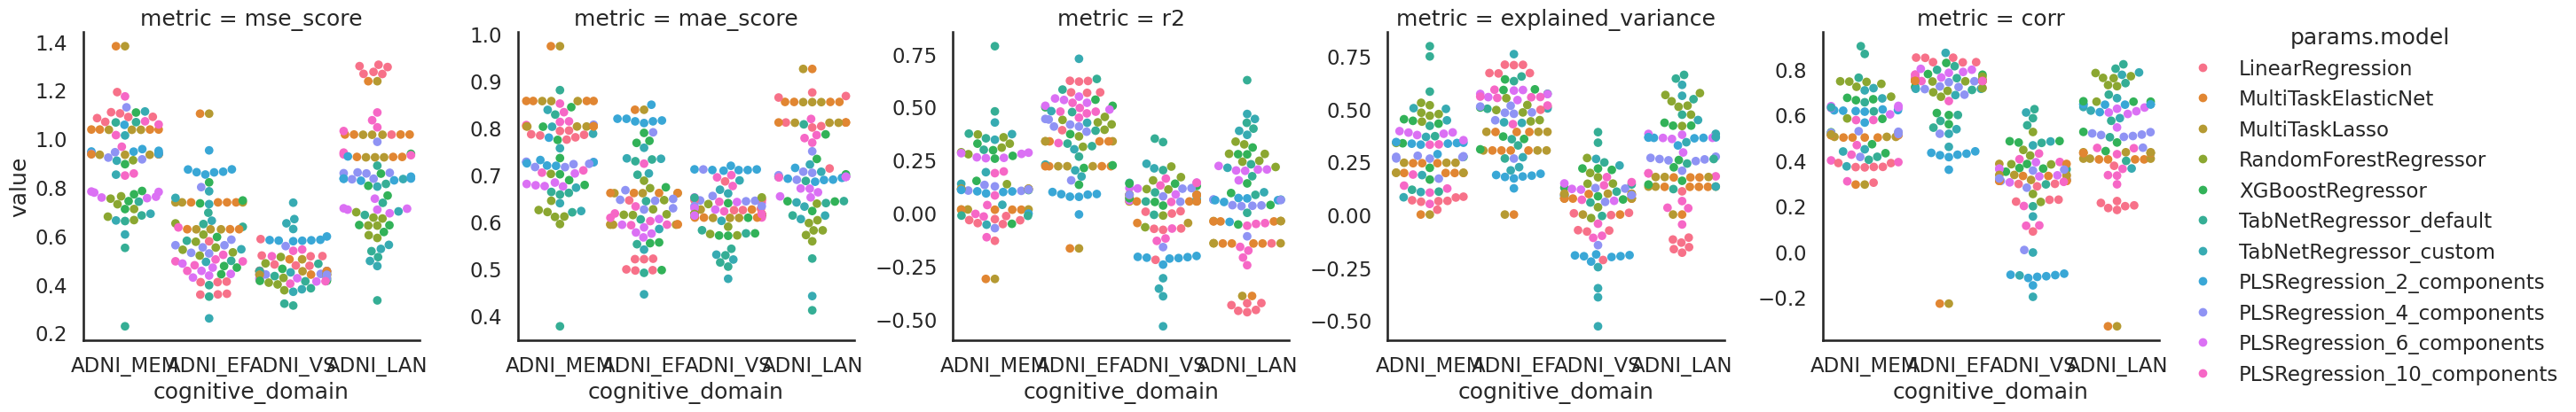

In [ ]:
df_plot_loonona_ajd = df_results_loonona_radar[df_results_loonona_radar['result_domain'] == "results_adj"]
df_plot_loonona_org = df_results_loonona_radar[df_results_loonona_radar['result_domain'] == "results_org"]

sns.catplot(data=df_plot_loonona_ajd, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)

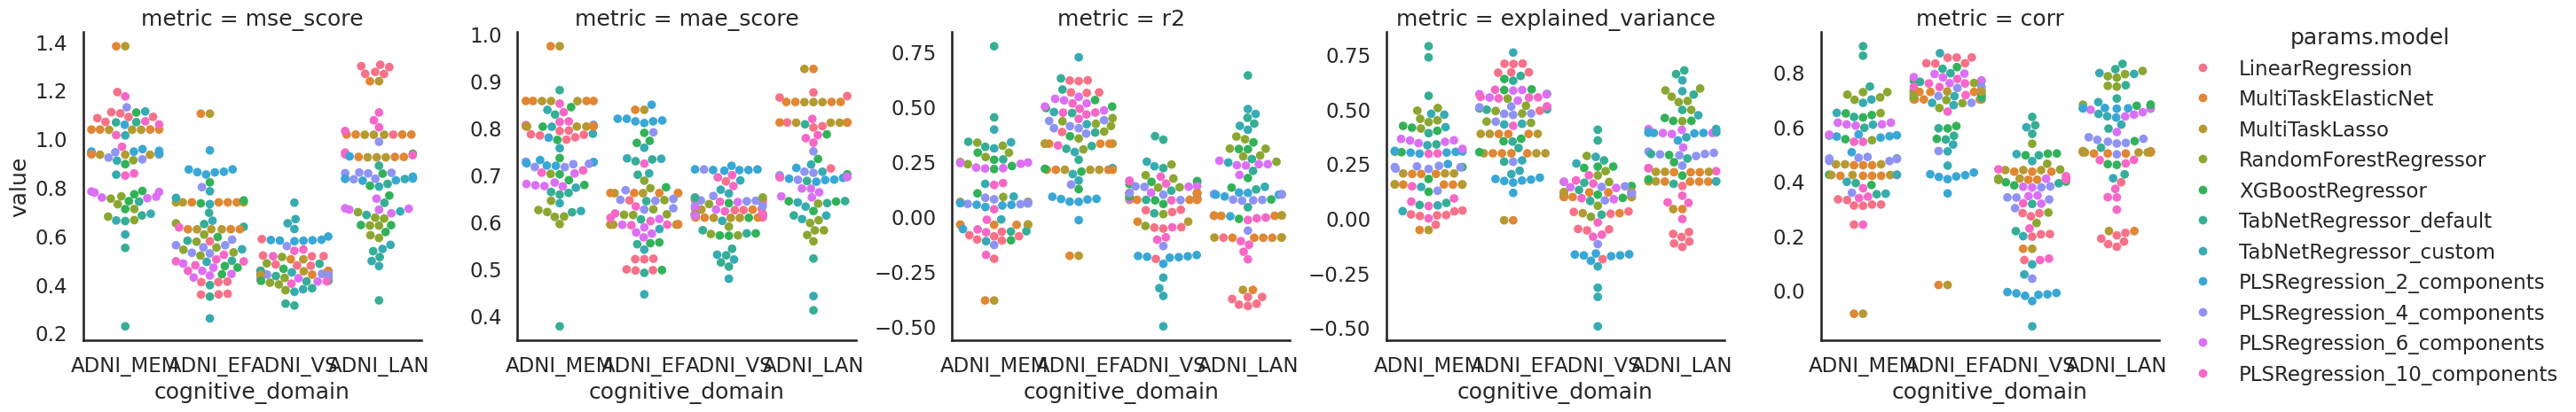

In [ ]:
sns.catplot(data=df_plot_loonona_org, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)

In [ ]:
df_plot_loonona_org[(df_plot_loonona_org.metric == "corr") & (df_plot_loonona_org.cognitive_domain == "ADNI_MEM")].sort_values(by="value")

params.ordinal_imputer params.continuous_imputer  \
2807                    NoImputer                 NoImputer   
2806                    NoImputer                 NoImputer   
2814                    NoImputer                 NoImputer   
2805                    NoImputer                 NoImputer   
2794       SimpleImputer_constant                KNNImputer   
...                           ...                       ...   
2830                   KNNImputer              KNNImputer_2   
2841       SimpleImputer_constant              KNNImputer_2   
2788                   KNNImputer                KNNImputer   
2821  SimpleImputer_most_frequent              KNNImputer_2   
2799       SimpleImputer_constant                KNNImputer   

                     params.model params.train_shape params.test_shape  value  \
2807               MultiTaskLasso        (2893, 200)          (1, 200) -0.087   
2806          MultiTaskElasticNet        (2893, 200)          (1, 200) -0.087   
2814  PLSRegression_10_components        (2893, 200)          (1, 200)  0.240   
2805             LinearRegression        (2882, 200)         (12, 200)  0.240   
2794             LinearRegression        [2893, 261]          [1, 261]  0.309   
...                           ...                ...               ...    ...   
2830        RandomForestRegressor        [2893, 261]          [1, 261]  0.726   
2841        RandomForestRegressor        [2893, 261]          [1, 261]  0.727   
2788      TabNetRegressor_default        [2893, 261]          [1, 261]  0.747   
2821      TabNetRegressor_default        [2893, 261]          [1, 261]  0.860   
2799      TabNetRegressor_default        [2893, 261]          [1, 261]  0.895   

     result_domain metric cognitive_domain  \
2807   results_org   corr         ADNI_MEM   
2806   results_org   corr         ADNI_MEM   
2814   results_org   corr         ADNI_MEM   
2805   results_org   corr         ADNI_MEM   
2794   results_org   corr         ADNI_MEM   
...            ...    ...              ...   
2830   results_org   corr         ADNI_MEM   
2841   results_org   corr         ADNI_MEM   
2788   results_org   corr         ADNI_MEM   
2821   results_org   corr         ADNI_MEM   
2799   results_org   corr         ADNI_MEM   

                                 preprocessing  \
2807                       NoImputer.NoImputer   
2806                       NoImputer.NoImputer   
2814                       NoImputer.NoImputer   
2805                       NoImputer.NoImputer   
2794         SimpleImputer_constant.KNNImputer   
...                                        ...   
2830                   KNNImputer.KNNImputer_2   
2841       SimpleImputer_constant.KNNImputer_2   
2788                     KNNImputer.KNNImputer   
2821  SimpleImputer_most_frequent.KNNImputer_2   
2799         SimpleImputer_constant.KNNImputer   

                                               pipeline  
2807                 NoImputer.NoImputer.MultiTaskLasso  
2806            NoImputer.NoImputer.MultiTaskElasticNet  
2814    NoImputer.NoImputer.PLSRegression_10_components  
2805               NoImputer.NoImputer.LinearRegression  
2794  SimpleImputer_constant.KNNImputer.LinearRegres...  
...                                                 ...  
2830      KNNImputer.KNNImputer_2.RandomForestRegressor  
2841  SimpleImputer_constant.KNNImputer_2.RandomFore...  
2788      KNNImputer.KNNImputer.TabNetRegressor_default  
2821  SimpleImputer_most_frequent.KNNImputer_2.TabNe...  
2799  SimpleImputer_constant.KNNImputer.TabNetRegres...  

[77 rows x 11 columns]

In [ ]:
df_plot_loonona_org[(df_plot_loonona_org.metric == "corr") & (df_plot_loonona_org.cognitive_domain == "ADNI_EF")].sort_values(by="value")

params.ordinal_imputer params.continuous_imputer  \
2884                    NoImputer                 NoImputer   
2883                    NoImputer                 NoImputer   
2889                    NoImputer                 NoImputer   
2878       SimpleImputer_constant                KNNImputer   
2856  SimpleImputer_most_frequent                KNNImputer   
...                           ...                       ...   
2849  SimpleImputer_most_frequent                KNNImputer   
2915       SimpleImputer_constant              KNNImputer_2   
2904                   KNNImputer              KNNImputer_2   
2893  SimpleImputer_most_frequent              KNNImputer_2   
2855  SimpleImputer_most_frequent                KNNImputer   

                    params.model params.train_shape params.test_shape  value  \
2884              MultiTaskLasso        (2893, 200)          (1, 200)  0.018   
2883         MultiTaskElasticNet        (2893, 200)          (1, 200)  0.018   
2889  PLSRegression_2_components        (2893, 200)          (1, 200)  0.355   
2878  PLSRegression_2_components        [2893, 261]          [1, 261]  0.407   
2856  PLSRegression_2_components        [2893, 261]          [1, 261]  0.415   
...                          ...                ...               ...    ...   
2849            LinearRegression        [2882, 261]         [12, 261]  0.833   
2915            LinearRegression        [2893, 261]          [1, 261]  0.853   
2904            LinearRegression        [2893, 261]          [1, 261]  0.854   
2893            LinearRegression        [2893, 261]          [1, 261]  0.854   
2855      TabNetRegressor_custom        [2893, 261]          [1, 261]  0.870   

     result_domain metric cognitive_domain  \
2884   results_org   corr          ADNI_EF   
2883   results_org   corr          ADNI_EF   
2889   results_org   corr          ADNI_EF   
2878   results_org   corr          ADNI_EF   
2856   results_org   corr          ADNI_EF   
...            ...    ...              ...   
2849   results_org   corr          ADNI_EF   
2915   results_org   corr          ADNI_EF   
2904   results_org   corr          ADNI_EF   
2893   results_org   corr          ADNI_EF   
2855   results_org   corr          ADNI_EF   

                                 preprocessing  \
2884                       NoImputer.NoImputer   
2883                       NoImputer.NoImputer   
2889                       NoImputer.NoImputer   
2878         SimpleImputer_constant.KNNImputer   
2856    SimpleImputer_most_frequent.KNNImputer   
...                                        ...   
2849    SimpleImputer_most_frequent.KNNImputer   
2915       SimpleImputer_constant.KNNImputer_2   
2904                   KNNImputer.KNNImputer_2   
2893  SimpleImputer_most_frequent.KNNImputer_2   
2855    SimpleImputer_most_frequent.KNNImputer   

                                               pipeline  
2884                 NoImputer.NoImputer.MultiTaskLasso  
2883            NoImputer.NoImputer.MultiTaskElasticNet  
2889     NoImputer.NoImputer.PLSRegression_2_components  
2878  SimpleImputer_constant.KNNImputer.PLSRegressio...  
2856  SimpleImputer_most_frequent.KNNImputer.PLSRegr...  
...                                                 ...  
2849  SimpleImputer_most_frequent.KNNImputer.LinearR...  
2915  SimpleImputer_constant.KNNImputer_2.LinearRegr...  
2904           KNNImputer.KNNImputer_2.LinearRegression  
2893  SimpleImputer_most_frequent.KNNImputer_2.Linea...  
2855  SimpleImputer_most_frequent.KNNImputer.TabNetR...  

[77 rows x 11 columns]

# Train models only on MRI features to compare performances

## Option 3 : Leave-one-out with missing values

In [ ]:
idx_na = list(df_X.isna().any(axis=1))
idx_nona = list(~df_X.isna().any(axis=1))

# Identify unique RIDs for rows with and without missing data
rid_na = df_all.loc[idx_na, "RID"].unique()
rid_nona = df_all.loc[idx_nona, "RID"].unique()

# Identify RIDs eligible for test set (not in train set)
eligible_rid_na = np.setdiff1d(rid_na, rid_nona)

df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]] = df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]].astype("category")


single_measurement_rids = (
    df_all[df_all["RID"].isin(eligible_rid_na)]
    .groupby("RID")
    .filter(lambda x: len(x) == 1)
    .RID.unique()
)

test_rids = np.random.choice(single_measurement_rids, size=20, replace=False)

# Create boolean mask for the test set
idx_test = df_all["RID"].isin(test_rids)

# Create boolean mask for the train set (all not in test)
idx_train = ~idx_test

print(idx_test.sum())

20


In [ ]:
idx_test

11      False
12      False
13      False
17      False
19      False
        ...  
9562    False
9573    False
9595    False
9611    False
9615    False
Name: RID, Length: 2894, dtype: bool

In [ ]:
random_state=42
n_imputation_iter = 10

# Define hyperparameters
gain_parameters = {
    'hint_rate': 0.9,
    'alpha': 100,
    'iterations': 1000
}

# Continuous Imputer List (list of tuples with unique strings and corresponding instances)
continuous_imputer_list = [
    ("NoImputer", KNNImputer(n_neighbors=1)),
]

# Ordinal Imputer List (list of tuples with unique strings and corresponding instances)
ordinal_imputer_list = [
    ("NoImputer", SimpleImputer(strategy="most_frequent"))
]

# Predictive Models List (list of tuples with unique strings and corresponding instances)
predictive_models_list = [
    ("LinearRegression", LinearRegression()),
    ("MultiTaskElasticNet", MultiTaskElasticNet()),
    ("MultiTaskLasso", MultiTaskLasso()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("XGBoostRegressor", XGBoostRegressor()),
    ("TabNetRegressor_default", TabNetModelWrapper()),
    ("TabNetRegressor_custom", TabNetModelWrapper(n_a=32, n_d=32)),
    ("PLSRegression_2_components", PLSRegression(n_components=2)),
    ("PLSRegression_4_components", PLSRegression(n_components=4)),
    ("PLSRegression_10_components", PLSRegression(n_components=10))
]

# Generate all combinations
combinations = list(product(continuous_imputer_list, ordinal_imputer_list, predictive_models_list))

# Display all combinations
for continuous_imputer, ordinal_imputer, model in combinations:
    print(f"Continuous Imputer: {continuous_imputer[0]}, Ordinal Imputer: {ordinal_imputer[0]}, Model: {model[0]}")

print(f"Combinations of preprocessing and models to test : {len(combinations)}")

Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: LinearRegression
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: MultiTaskElasticNet
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: MultiTaskLasso
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: RandomForestRegressor
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: XGBoostRegressor
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: TabNetRegressor_default
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: TabNetRegressor_custom
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: PLSRegression_2_components
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: PLSRegression_4_components
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: PLSRegression_10_components
Combinations of preprocessing and models to test : 10


In [ ]:
test_indices = [i for i, val in enumerate(idx_test) if val]

In [ ]:
results_file = './6.1.2_missingnesss_aware_selection_pickle/training_4_loona_dict_results.pickle'

with open(results_file, "rb") as input_file:
    all_dict_results = pickle.load(input_file)

In [ ]:
test_rids = all_dict_results[0]["params"]["test_rid"]

# Create boolean mask for the test set
idx_test = df_all["RID"].isin(test_rids)

# Create boolean mask for the train set (all not in test)
idx_train = ~idx_test

print(idx_test.sum())

test_indices = [i for i, val in enumerate(idx_test) if val]

20


In [ ]:
all([results["params"]["test_rid"] == test_rids for results in all_dict_results])

False

In [ ]:
len(all_dict_results)

43

In [ ]:
test_indices

[12,
 97,
 128,
 862,
 1081,
 1183,
 1335,
 1343,
 1525,
 1706,
 1972,
 2061,
 2269,
 2286,
 2355,
 2449,
 2557,
 2586,
 2679,
 2880]

In [ ]:
list(df_all.iloc[test_indices].values)

[array([15, 'm06', 'ADNI1', 'ADNI1', '2006-04-18', '2006-04-18', 1.111,
        1.149, 0.706, 1.983, 'ADNI1', '100_S_0015', 'm06', 1.0, 1.0, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 5.0, 7.0, 11.0,
        9.0, 8.0, 7.0, 6.0, 9.0, 6.0, 24.0, 12.0, 26.0, 37.0, 66.0, 15.0,
        29.0, 6.0, 13.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        'Processed', 'ADNI1/GO Month 6', 1.5, 'MPR; ; N3; Scaled',
        '2006-04-18', 3621.0, 13657.0, '100_S_0015', 100.0, 'CN', 80.8,
        1.0, 18.0, 'Not Hisp/Latino', 'White', 'Married', 1.0, nan, nan,
        nan, nan, nan, nan, 0.0, 3.0, 5.0, 2.0, 30.0, 40.0, 3.0, 2.0, 25.0,
        0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, '1.5 Tesla MRI',
        'Cross-Sectional FreeSurfer (FreeSurfer Version 4.3)', 33049.0,
        32392.0,

In [ ]:
idx_train.sum()

2874

In [ ]:
idx_test

11      False
12      False
13      False
17      False
19      False
        ...  
9562    False
9573    False
9595    False
9611    False
9615    False
Name: RID, Length: 2894, dtype: bool

In [ ]:
for continuous_imputer, ordinal_imputer, model in combinations:
    name_continuous_imputer, continuous_imputer_instance = continuous_imputer
    name_ordinal_imputer, ordinal_imputer_instance = ordinal_imputer
    name_model, model_instance = model

    params = {
            "ordinal_imputer": name_ordinal_imputer, 
            "continuous_imputer": name_continuous_imputer, 
            "model": name_model, "train_shape" : df_X_train.shape, 
            "test_shape": df_X_test.shape,
            "test_rid": list(df_all.iloc[test_indices])
        }
    
    dict_results = {
            "params": params, 
            "imputation_time": [],
            "fitting_time": [], 
            "results_adj": [], 
            "results_org": []
        }

    for test_nloc in test_indices: 

        idx_train = [True for i in range(df_X.shape[0])]
        idx_test = [False for i in range(df_X.shape[0])]

        idx_test[test_nloc] = True
        idx_train[test_nloc] = False

        df_X_train = df_X[select["MRIth"]].loc[idx_train]
        df_X_test = df_X[select["MRIth"]].loc[idx_test]

        df_y_train = df_y.loc[idx_train]
        df_y_test = df_y.loc[idx_test]

        c_train = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_train]
        c_test = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_test]

        try: 
        
            # Now you can call your `train_model` function with these components
            fold_dict_results = train_imputer_model(
                df_X_train, df_X_test, df_y_train, df_y_test,
                c_train, c_test,
                ordinal_imputer_instance, name_ordinal_imputer,
                continuous_imputer_instance, name_continuous_imputer,
                model_instance, name_model,
                separate_imputers=True  # Or however you want to specify
            )

            dict_results["imputation_time"].append(fold_dict_results["imputation_time"])  
            dict_results["fitting_time"].append(fold_dict_results["fitting_time"])  
            dict_results["results_adj"].append(fold_dict_results["results_adj"])  
            dict_results["results_org"].append(fold_dict_results["results_org"])    

        except Exception as e:  

            print(e)
            
    # Optionally keep the all_dict_results list updated
    all_dict_results.append(dict_results)
    
    # Save the updated results back to the pickle file
    with open(results_file, 'wb') as f:
        pickle.dump(all_dict_results, f)


Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Saving predictions in dict!
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Saving predictions in dict!
Using separate i

KeyboardInterrupt: 

In [ ]:
len(all_dict_results)

43

In [ ]:
with open('./6.1.2_missingnesss_aware_selection_pickle/training_4_loona_dict_results.pickle', "rb") as input_file:
    dict_results_loo_nona = pickle.load(input_file)

dict_results_loo_nona_copy_failed = dict_results_loo_nona

In [ ]:
dict_results_loo_nona_copy_failed

[{'params': {'ordinal_imputer': 'SimpleImputer_most_frequent',
   'continuous_imputer': 'KNNImputer',
   'model': 'LinearRegression',
   'train_shape': (2893, 261),
   'test_shape': (1, 261),
   'test_rid': [15,
    69,
    88,
    680,
    886,
    957,
    1099,
    1116,
    1276,
    2073,
    4076,
    4170,
    4366,
    4383,
    4441,
    4547,
    4646,
    4679,
    4809,
    5142]},
  'imputation_time': [3.743319511413574,
   3.6071808338165283,
   3.6088316440582275,
   3.5503551959991455,
   3.6759912967681885,
   3.6502671241760254,
   3.7612340450286865,
   3.544062376022339,
   3.640187978744507,
   3.5111892223358154,
   3.6654648780822754,
   3.5460045337677,
   3.7707672119140625,
   3.6405701637268066,
   3.542612075805664,
   3.534588098526001,
   3.6970882415771484,
   3.791170120239258,
   3.581756114959717,
   3.766244411468506],
  'fitting_time': [0.10106253623962402,
   0.07858920097351074,
   0.07788610458374023,
   0.08089184761047363,
   0.07731866836547852

In [ ]:
#with open('./6.1.2_missingnesss_aware_selection_pickle/backup/training_4_loona_dict_results.pickle', "rb") as input_file:
#    dict_results_loo_nona = pickle.load(input_file)

In [ ]:
len(dict_results_loo_nona)

43

In [ ]:
df_results_nona = pd.json_normalize(dict_results_loo_nona)

In [ ]:
metrics = ["mse_score", "mae_score", "r2", "explained_variance", "corr"]
results = ["results_adj", "results_org"]

df_results_nona = pd.json_normalize(dict_results_loo_nona)

def extract_metric(row, metric): 

    y_test = np.concatenate([temp_dict["y_test"] for temp_dict in row])
    y_pred = np.concatenate([temp_dict["y_pred"] for temp_dict in row])

    mse_score, mae_score, r2, explained_variance, corr = compute_all_metrics(y_test=y_test, y_pred=y_pred)

    output = None

    if metric=="mse_score": 
        output=mse_score
    elif metric=="mae_score": 
        output=mae_score
    elif metric=="r2": 
        output=r2        
    elif metric=="explained_variance": 
        output=explained_variance
    elif metric=="corr": 
        output=corr   

    return list(output.T)


In [ ]:
for metric in metrics: 
    df_results_nona[f"results_adj.{metric}"] = df_results_nona["results_adj"].apply(extract_metric, metric=metric)
    df_results_nona[f"results_org.{metric}"] = df_results_nona["results_org"].apply(extract_metric, metric=metric)

In [ ]:
for results in ["results_adj", "results_org"]: 
    for metric in metrics: 
        new_cols = list(f"{results}.{metric}." +df_y.columns) 
        new_cols_to_add = df_results_nona[f"{results}.{metric}"].apply(pd.Series, index=new_cols)

        df_results_nona = pd.concat([df_results_nona, new_cols_to_add], axis=1)

In [ ]:
df_results_nona.columns

Index(['imputation_time', 'fitting_time', 'results_adj', 'results_org',
       'params.ordinal_imputer', 'params.continuous_imputer', 'params.model',
       'params.train_shape', 'params.test_shape', 'params.test_rid',
       'results_adj.mse_score', 'results_org.mse_score',
       'results_adj.mae_score', 'results_org.mae_score', 'results_adj.r2',
       'results_org.r2', 'results_adj.explained_variance',
       'results_org.explained_variance', 'results_adj.corr',
       'results_org.corr', 'results_adj.mse_score.ADNI_MEM',
       'results_adj.mse_score.ADNI_EF', 'results_adj.mse_score.ADNI_VS',
       'results_adj.mse_score.ADNI_LAN', 'results_adj.mae_score.ADNI_MEM',
       'results_adj.mae_score.ADNI_EF', 'results_adj.mae_score.ADNI_VS',
       'results_adj.mae_score.ADNI_LAN', 'results_adj.r2.ADNI_MEM',
       'results_adj.r2.ADNI_EF', 'results_adj.r2.ADNI_VS',
       'results_adj.r2.ADNI_LAN', 'results_adj.explained_variance.ADNI_MEM',
       'results_adj.explained_variance.ADNI

In [ ]:
df_results_loonona_radar = df_results_nona.melt(id_vars=df_results_nona.columns[df_results_nona.columns.str.startswith("params")].tolist(), value_vars=df_results_nona.columns[df_results_nona.columns.str.contains("ADNI")].tolist())
df_results_loonona_radar["result_domain"] = df_results_loonona_radar["variable"].apply(lambda x: x.split(".")[0])
df_results_loonona_radar["metric"] = df_results_loonona_radar["variable"].apply(lambda x: x.split(".")[1])

In [ ]:
df_results_loonona_radar["cognitive_domain"] = df_results_loonona_radar["variable"].apply(lambda x: x.split(".")[2])
df_results_loonona_radar = df_results_loonona_radar.drop(columns=["variable"])
df_results_loonona_radar["preprocessing"] =  df_results_loonona_radar[['params.ordinal_imputer', 'params.continuous_imputer']].agg('.'.join, axis=1)

In [ ]:
df_results_loonona_radar["pipeline"] =  df_results_loonona_radar[['params.ordinal_imputer', 'params.continuous_imputer', 'params.model']].agg('.'.join, axis=1)

In [ ]:
df_results_radar_to_latex_pretable(df_results_loonona_radar, result_domain="results_adj", scoring_metric="corr", ascending=False)

params.ordinal_imputer_ params.continuous_imputer_  \
30       SimpleImputer_constant                 KNNImputer   
40  SimpleImputer_most_frequent                 KNNImputer   
7                    KNNImputer                 KNNImputer   
39  SimpleImputer_most_frequent                 KNNImputer   
31       SimpleImputer_constant                 KNNImputer   
9                    KNNImputer                 KNNImputer   
17                    NoImputer                  NoImputer   
20                    NoImputer                  NoImputer   
28       SimpleImputer_constant                 KNNImputer   
36  SimpleImputer_most_frequent                 KNNImputer   
37  SimpleImputer_most_frequent                 KNNImputer   
4                    KNNImputer                 KNNImputer   
25       SimpleImputer_constant                 KNNImputer   
15                    NoImputer                  NoImputer   
26       SimpleImputer_constant                 KNNImputer   
29       SimpleImputer_constant                 KNNImputer   
5                    KNNImputer                 KNNImputer   
16                    NoImputer                  NoImputer   
10                   KNNImputer                 KNNImputer   
42  SimpleImputer_most_frequent                 KNNImputer   
8                    KNNImputer                 KNNImputer   
38  SimpleImputer_most_frequent                 KNNImputer   
27       SimpleImputer_constant                 KNNImputer   
6                    KNNImputer                 KNNImputer   
18                    NoImputer                  NoImputer   
35  SimpleImputer_most_frequent                 KNNImputer   
3                    KNNImputer                 KNNImputer   
41  SimpleImputer_most_frequent                 KNNImputer   
24       SimpleImputer_constant                 KNNImputer   
0                    KNNImputer                 KNNImputer   
32  SimpleImputer_most_frequent                 KNNImputer   
21       SimpleImputer_constant                 KNNImputer   
14                    NoImputer                  NoImputer   
19                    NoImputer                  NoImputer   
11                    NoImputer                  NoImputer   
22       SimpleImputer_constant                 KNNImputer   
33  SimpleImputer_most_frequent                 KNNImputer   
1                    KNNImputer                 KNNImputer   
23       SimpleImputer_constant                 KNNImputer   
34  SimpleImputer_most_frequent                 KNNImputer   
2                    KNNImputer                 KNNImputer   
13                    NoImputer                  NoImputer   
12                    NoImputer                  NoImputer   

                  params.model_  corr_ADNI_EF  corr_ADNI_LAN  corr_ADNI_MEM  \
30      TabNetRegressor_default         0.402          0.692          0.679   
40       TabNetRegressor_custom         0.529          0.828          0.493   
7         RandomForestRegressor         0.378          0.701          0.717   
39        RandomForestRegressor         0.392          0.727          0.754   
31             XGBoostRegressor         0.591          0.707          0.708   
9       TabNetRegressor_default         0.487          0.668          0.620   
17        RandomForestRegressor         0.433          0.760          0.682   
20             XGBoostRegressor         0.478          0.669          0.703   
28        RandomForestRegressor         0.408          0.719          0.695   
36   PLSRegression_2_components         0.380          0.671          0.628   
37   PLSRegression_4_components         0.363          0.701          0.634   
4    PLSRegression_2_components         0.382          0.667          0.622   
25   PLSRegression_2_components         0.379          0.671          0.622   
15   PLSRegression_2_components         0.380          0.669          0.643   
26   PLSRegression_4_components         0.361          0.702          0.614   
29       TabNet

In [ ]:
df_results_radar_to_latex_pretable(df_results_loonona_radar, result_domain="results_adj", scoring_metric="mae_score", ascending=True)

params.ordinal_imputer_ params.continuous_imputer_  \
20                    NoImputer                  NoImputer   
39  SimpleImputer_most_frequent                 KNNImputer   
17                    NoImputer                  NoImputer   
7                    KNNImputer                 KNNImputer   
28       SimpleImputer_constant                 KNNImputer   
31       SimpleImputer_constant                 KNNImputer   
25       SimpleImputer_constant                 KNNImputer   
15                    NoImputer                  NoImputer   
36  SimpleImputer_most_frequent                 KNNImputer   
30       SimpleImputer_constant                 KNNImputer   
4                    KNNImputer                 KNNImputer   
26       SimpleImputer_constant                 KNNImputer   
37  SimpleImputer_most_frequent                 KNNImputer   
40  SimpleImputer_most_frequent                 KNNImputer   
5                    KNNImputer                 KNNImputer   
16                    NoImputer                  NoImputer   
10                   KNNImputer                 KNNImputer   
27       SimpleImputer_constant                 KNNImputer   
42  SimpleImputer_most_frequent                 KNNImputer   
38  SimpleImputer_most_frequent                 KNNImputer   
6                    KNNImputer                 KNNImputer   
9                    KNNImputer                 KNNImputer   
29       SimpleImputer_constant                 KNNImputer   
14                    NoImputer                  NoImputer   
3                    KNNImputer                 KNNImputer   
35  SimpleImputer_most_frequent                 KNNImputer   
2                    KNNImputer                 KNNImputer   
34  SimpleImputer_most_frequent                 KNNImputer   
23       SimpleImputer_constant                 KNNImputer   
22       SimpleImputer_constant                 KNNImputer   
1                    KNNImputer                 KNNImputer   
33  SimpleImputer_most_frequent                 KNNImputer   
18                    NoImputer                  NoImputer   
24       SimpleImputer_constant                 KNNImputer   
41  SimpleImputer_most_frequent                 KNNImputer   
11                    NoImputer                  NoImputer   
32  SimpleImputer_most_frequent                 KNNImputer   
0                    KNNImputer                 KNNImputer   
21       SimpleImputer_constant                 KNNImputer   
19                    NoImputer                  NoImputer   
13                    NoImputer                  NoImputer   
12                    NoImputer                  NoImputer   
8                    KNNImputer                 KNNImputer   

                  params.model_  mae_score_ADNI_EF  mae_score_ADNI_LAN  \
20             XGBoostRegressor              0.530               0.459   
39        RandomForestRegressor              0.629               0.450   
17        RandomForestRegressor              0.594               0.423   
7         RandomForestRegressor              0.644               0.458   
28        RandomForestRegressor              0.596               0.444   
31             XGBoostRegressor              0.578               0.437   
25   PLSRegression_2_components              0.606               0.488   
15   PLSRegression_2_components              0.621               0.480   
36   PLSRegression_2_components              0.609               0.491   
30      TabNetRegressor_default              0.622               0.444   
4    PLSRegression_2_components              0.607               0.494   
26   PLSRegression_4_components              0.613               0.466   
37   PLSRegression_4_components              0.619               0.467   
40       TabNetRegressor_custom              0.509               0.386   
5    PLSRegression_4_components              0.621               0.477   
16   PLSRegression_4_components              0.653               0.465   
10             XGBoos

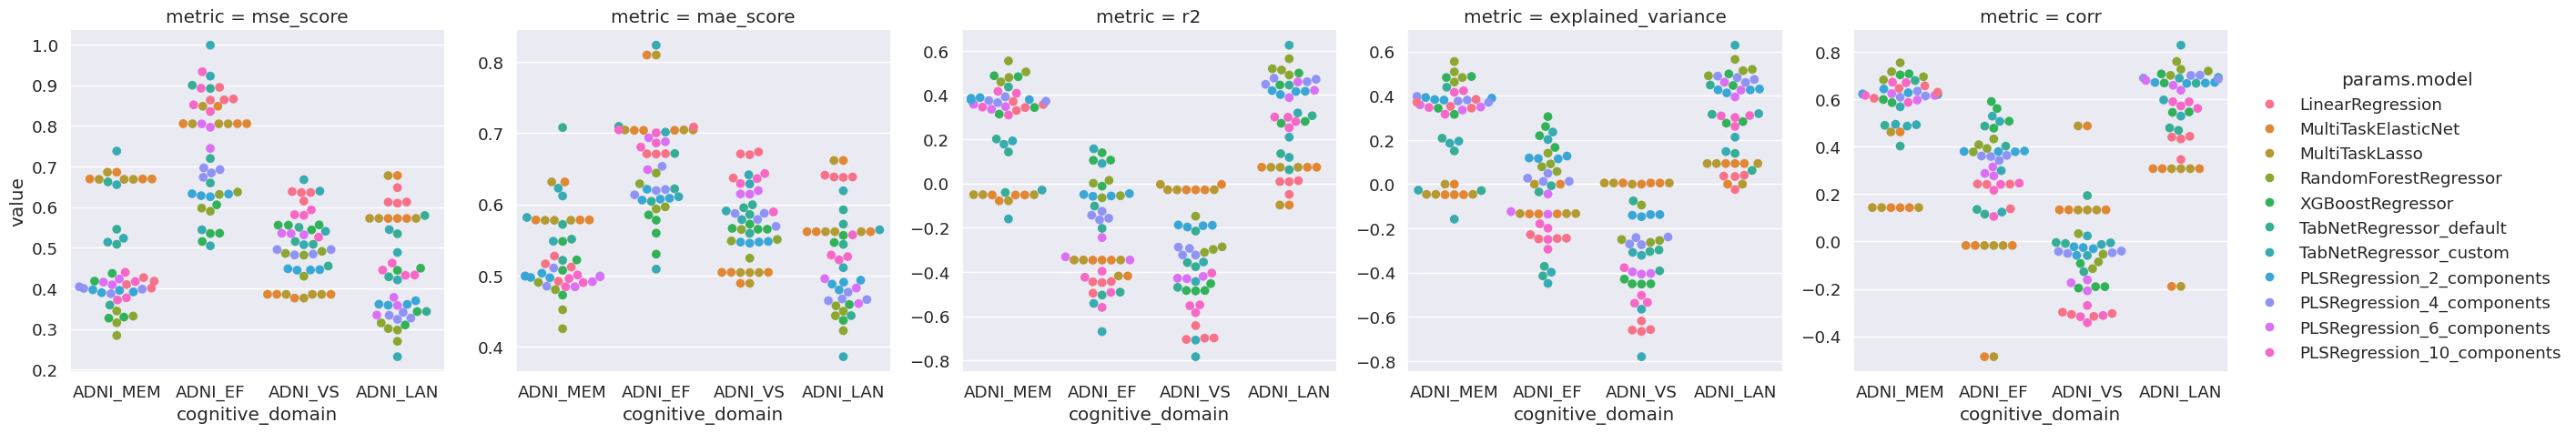

In [ ]:
df_plot_loonona_ajd = df_results_loonona_radar[df_results_loonona_radar['result_domain'] == "results_adj"]
df_plot_loonona_org = df_results_loonona_radar[df_results_loonona_radar['result_domain'] == "results_org"]

sns.catplot(data=df_plot_loonona_ajd, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)

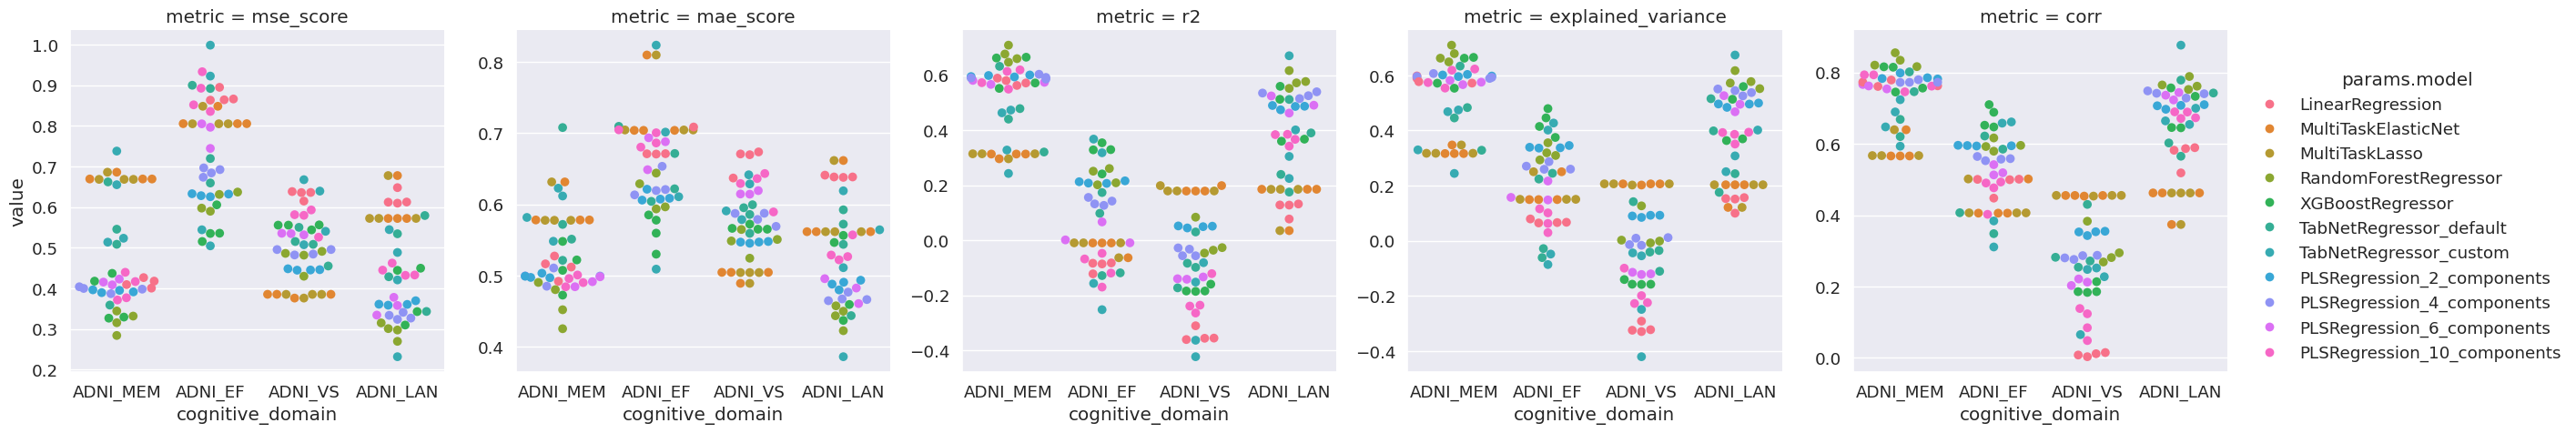

In [ ]:
sns.catplot(data=df_plot_loonona_org, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)